In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# runs = ELPH_utils.load_runs()

# runs_w002 = ELPH_utils.load_runs(filename='../runs_w0.02.npz')
# runs_w003 = ELPH_utils.load_runs(filename='../runs_w0.03.npz')
# runs_w01 = ELPH_utils.load_runs(filename='../runs_w0.1.npz')

# runs = runs[:] + runs_w002[:] + runs_w003 + runs_w01


runs = ELPH_utils.load_runs(filename='../runs_rand_inits.npz')


n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

500 loaded with n_kmax = 80


In [ ]:
err = []
for i,a in enumerate(np.linspace(0.01,50,20)):
    err.append([])
    for b in np.linspace(0.01,50,20):
        wcols = 1.0 + a*np.exp(-1.*b*np.linspace(0,1,runs[0].shape[1]))

        m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':15, 'wcols':wcols}, score_kwargs={'norm':'max'})
        print(m)
        err[i].append(m)

In [12]:
from ELPH_SVDAPPRX import SVDAPPRX

model = SVDAPPRX(runs)
model.train()

In [13]:
def maximize_pred_acc_weighted_data(a, b):
    wcols = 1.0 + a*np.exp(-1.*b*np.linspace(0,1,runs[0].shape[1]))
    m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':15, 'wcols':wcols}, score_kwargs={'norm':'max'})
    return -m


from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'a': (0.01, 50), 'b':(0.01, 50)}

optimizer = BayesianOptimization(
    f=maximize_pred_acc_weighted_data,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(
    init_points=10,
    n_iter=100,
)

|   iter    |  target   |     a     |     b     |
-------------------------------------------------
|  1        | -0.04118  |  20.86    |  36.02    |
|  2        | -0.04595  |  0.01572  |  15.12    |
|  3        | -0.04412  |  7.346    |  4.626    |
|  4        | -0.04103  |  9.321    |  17.28    |
|  5        | -0.04189  |  19.84    |  26.95    |
|  6        | -0.0412   |  20.97    |  34.26    |
|  7        | -0.04143  |  10.23    |  43.91    |
|  8        | -0.04249  |  1.379    |  33.53    |
|  9        | -0.04205  |  20.87    |  27.94    |
|  10       | -0.04263  |  7.028    |  9.913    |
|  11       | -0.04368  |  16.35    |  15.93    |
|  12       | -0.04098  |  14.45    |  35.86    |
|  13       | -0.04034  |  10.35    |  24.92    |
|  14       | -0.0405   |  11.09    |  30.25    |
|  15       | -0.04252  |  20.68    |  49.55    |
|  16       | -0.04598  |  0.01     |  50.0     |
|  17       | -0.04521  |  35.98    |  38.79    |
|  18       | -0.04545  |  49.92    |  0.5473   |


|  100      | -0.04031  |  11.61    |  25.9     |
|  101      | -0.04031  |  11.52    |  25.67    |
|  102      | -0.04031  |  11.38    |  25.84    |
|  103      | -0.04031  |  11.61    |  25.64    |
|  104      | -0.04031  |  11.72    |  25.76    |
|  105      | -0.04031  |  11.72    |  25.88    |
|  106      | -0.04031  |  11.47    |  25.97    |
|  107      | -0.04031  |  11.79    |  26.05    |
|  108      | -0.04031  |  11.4     |  25.87    |
|  109      | -0.04032  |  11.88    |  26.51    |
|  110      | -0.04031  |  11.75    |  25.72    |


In [14]:
def maximize_pred_acc_weighted_data(a, b):
    wcols = 1.0 + a*np.exp(-1.*b*np.linspace(0,1,runs[0].shape[1]))
    m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':10, 'wcols':wcols}, score_kwargs={'norm':'max'})
    return -m


from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'a': (0.01, 50), 'b':(0.01, 50)}

optimizer = BayesianOptimization(
    f=maximize_pred_acc_weighted_data,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(
    init_points=10,
    n_iter=100,
)

|   iter    |  target   |     a     |     b     |
-------------------------------------------------
|  1        | -0.09854  |  20.86    |  36.02    |
|  2        | -0.1373   |  0.01572  |  15.12    |
|  3        | -0.1253   |  7.346    |  4.626    |
|  4        | -0.1065   |  9.321    |  17.28    |
|  5        | -0.1008   |  19.84    |  26.95    |
|  6        | -0.09898  |  20.97    |  34.26    |
|  7        | -0.09698  |  10.23    |  43.91    |
|  8        | -0.1185   |  1.379    |  33.53    |
|  9        | -0.1007   |  20.87    |  27.94    |
|  10       | -0.1159   |  7.028    |  9.913    |
|  11       | -0.09644  |  21.7     |  50.0     |
|  12       | -0.1065   |  40.52    |  45.98    |
|  13       | -0.1124   |  30.6     |  11.81    |
|  14       | -0.1129   |  50.0     |  26.92    |
|  15       | -0.1198   |  1.161    |  49.99    |
|  16       | -0.1376   |  50.0     |  0.01     |
|  17       | -0.1048   |  33.59    |  34.24    |
|  18       | -0.09608  |  14.6     |  50.0     |


KeyboardInterrupt: 

In [15]:
def maximize_pred_acc_weighted_data(a, b):
    wcols = 1.0 + a*np.exp(-1.*b*np.linspace(0,1,runs[0].shape[1]))
    m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':20, 'wcols':wcols}, score_kwargs={'norm':'max'})
    return -m


from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'a': (0.01, 50), 'b':(0.01, 50)}

optimizer = BayesianOptimization(
    f=maximize_pred_acc_weighted_data,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(
    init_points=10,
    n_iter=100,
)

|   iter    |  target   |     a     |     b     |
-------------------------------------------------
|  1        | -0.02072  |  20.86    |  36.02    |
|  2        | -0.02361  |  0.01572  |  15.12    |
|  3        | -0.02044  |  7.346    |  4.626    |
|  4        | -0.01925  |  9.321    |  17.28    |
|  5        | -0.02032  |  19.84    |  26.95    |
|  6        | -0.02057  |  20.97    |  34.26    |
|  7        | -0.0209   |  10.23    |  43.91    |
|  8        | -0.01931  |  1.379    |  33.53    |
|  9        | -0.02049  |  20.87    |  27.94    |
|  10       | -0.01959  |  7.028    |  9.913    |
|  11       | -0.01969  |  13.1     |  12.91    |
|  12       | -0.01947  |  13.43    |  21.25    |
|  13       | -0.01941  |  7.537    |  29.08    |
|  14       | -0.02061  |  0.6109   |  40.85    |
|  15       | -0.02091  |  0.5533   |  28.08    |
|  16       | -0.01964  |  7.352    |  34.49    |
|  17       | -0.02151  |  22.39    |  16.57    |
|  18       | -0.01986  |  12.84    |  28.93    |


KeyboardInterrupt: 

In [ ]:
def maximize_pred_acc_weighted_data_log_func(a, b, c):
    wcols = a/(1.0 + np.exp(1.*b*(np.linspace(-10,10,runs[0].shape[1]) - c)))
    m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':10, 'wcols':wcols}, score_kwargs={'norm':'max'})
    return -m


from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'a': (0, 50), 'b':(0, 50) , 'c':(0, 50)}

optimizer = BayesianOptimization(
    f=maximize_pred_acc_weighted_data_log_func,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(
    init_points=10,
    n_iter=100,
)

|   iter    |  target   |     a     |     b     |     c     |
-------------------------------------------------------------
|  1        | -0.1375   |  20.85    |  36.02    |  0.005719 |
|  2        | -0.1376   |  15.12    |  7.338    |  4.617    |
|  3        | -0.1377   |  9.313    |  17.28    |  19.84    |
|  4        | -0.1377   |  26.94    |  20.96    |  34.26    |
|  5        | -0.1376   |  10.22    |  43.91    |  1.369    |
|  6        | -0.1377   |  33.52    |  20.87    |  27.93    |
|  7        | -0.1377   |  7.019    |  9.905    |  40.04    |
|  8        | -0.1377   |  48.41    |  15.67    |  34.62    |
|  9        | -0.1376   |  43.82    |  44.73    |  4.252    |
|  10       | -0.1377   |  1.953    |  8.492    |  43.91    |
|  11       | -0.1375   |  21.79    |  35.87    |  0.7084   |
|  12       | -0.1376   |  18.93    |  38.71    |  1.446    |
|  13       | -0.1375   |  20.02    |  36.1     |  0.6785   |
|  14       | -0.1375   |  22.32    |  38.67    |  0.5845   |
|  15   

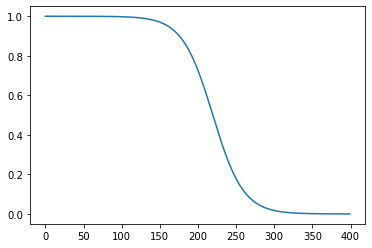

In [24]:
a = 1.0
b = 1.0
c = 1.0

plt.plot(a/(1.0 + np.exp(1.*b*(np.linspace(-10,10,runs[0].shape[1]) - c))))